## import Libraries

In [1]:
#Importing Libraries
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

sns.set(style="darkgrid") # set the background for the graphs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#handling missing value
from sklearn.impute import SimpleImputer

#importing warning library ignoring unwanted error message
import warnings
warnings.filterwarnings("ignore")

#import Scipy libarary for statistical analysis
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

#import Algorithm libaries for feature importance, data processing, modeling & evaluation
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Algorithms for handling Imbalance Data
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
#importing plotly library for some great visualizations
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.express as px

## Reading Data

In [3]:
train_df= pd.read_csv('train_ctrUa4K.csv')
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
test_df = pd.read_csv("train_ctrUa4K.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.shape

(614, 13)

In [6]:
test_df.shape

(614, 13)

In [7]:
train_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## Data Exploration

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train_df.duplicated().sum()

0

In [11]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#the Id column is not needed, let's drop it for both test and train datasets
train_df.drop('Loan_ID',axis=1,inplace=True)
test_df.drop('Loan_ID',axis=1,inplace=True)

In [13]:
train_df.shape

(614, 12)

In [14]:
test_df.shape

(614, 12)

In [15]:
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{train_df[col].value_counts()}\n","-"*50)
    train_df[col] = train_df[col].fillna(
    train_df[col].dropna().mode().values[0] )   

    
train_df.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{train_df[col].value_counts()}\n","-"*50)
    

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

In [16]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data visalization

In [17]:
train_df.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
train_df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
train_df['Dependents'].mode()[0]

'0'

In [20]:
train_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
train_df['Self_Employed'].mode()[0]

'No'

In [22]:
train_df.LoanAmount.value_counts()

120.0    42
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [23]:
train_df['LoanAmount'].mean()

145.4657980456026

In [24]:
train_df['Loan_Amount_Term'].mean()

342.4104234527687

In [25]:
train_df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [26]:
train_df['Credit_History'].mode()[0]

1.0

In [27]:
train_df['CoapplicantIncome'].mean()

1621.245798027101

In [28]:
train_df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [29]:
train_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [30]:
train_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [31]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [32]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [33]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


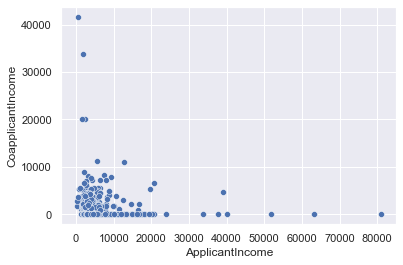

In [34]:
# remove outlier 
#have to work on outlies
applicant_income=train_df['ApplicantIncome']
co_applicant_income=train_df['CoapplicantIncome']
sns.scatterplot(x=applicant_income,y=co_applicant_income)

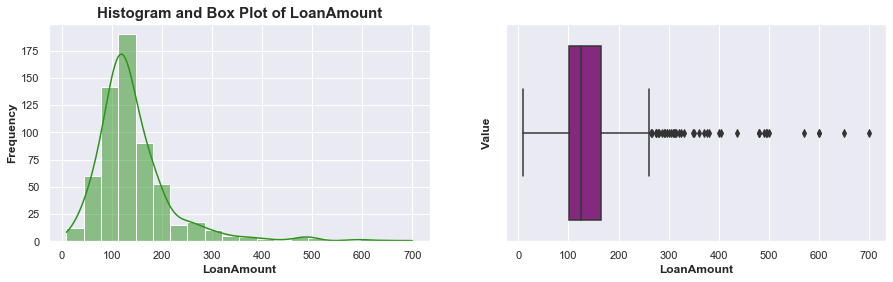

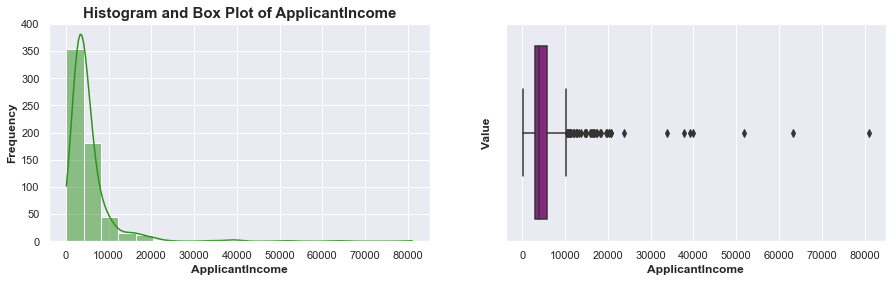

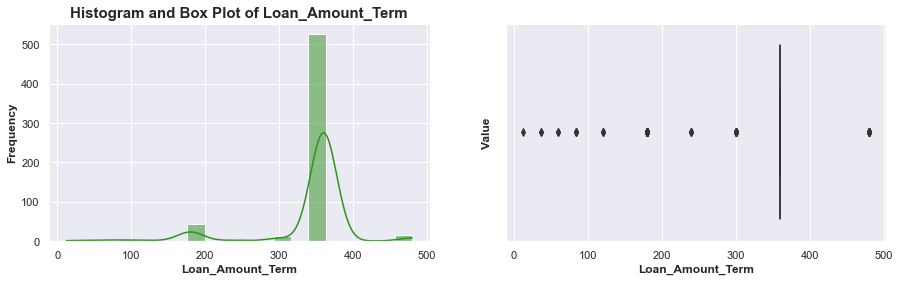

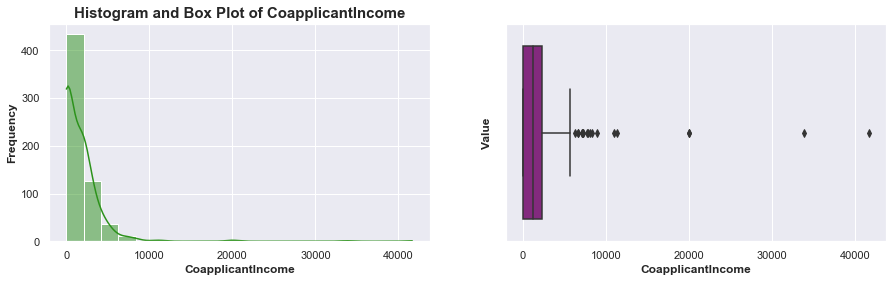

In [35]:
#Creating a list including the columns have outliers
col_outliers = ["LoanAmount","ApplicantIncome","Loan_Amount_Term","CoapplicantIncome"]

#Creating a function of visualizing outliers using box and distribution plots
def plot_hist_box(train_df, column):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
    sns.histplot(data=train_df, x=column, bins=20, kde=True, ax=ax1, color='#2c921b')
    sns.boxplot(data=train_df, x=column, ax=ax2, color='#921b8b')
    ax1.set_title(f"Histogram and Box Plot of {column}", size=15, weight='bold')
    ax1.set_xlabel(column, size=12, weight='bold')
    ax1.set_ylabel("Frequency", size=12, weight='bold')
    ax2.set_xlabel(column, size=12, weight='bold')
    ax2.set_ylabel("Value", size=12, weight='bold')
    plt.show()

#Showing all the columns in one action 
for col in col_outliers:
    plot_hist_box(train_df, col)

In [36]:
def remove_outliers(train_df, columns, k=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = train_df[(train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)]
    return data

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [38]:

#list of all the numeric columns
num = train_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train_df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  train_df[num]
#categoric df
loan_cat = train_df[cat]

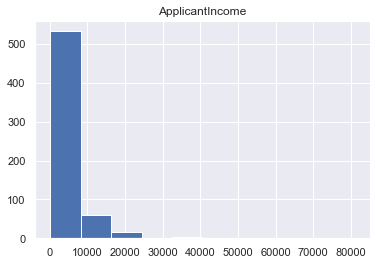

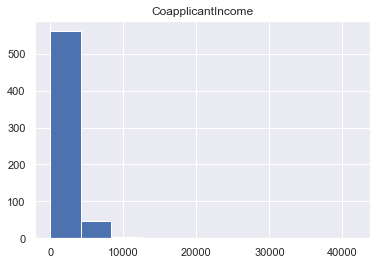

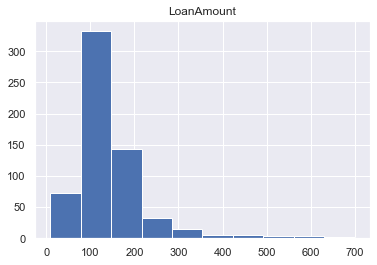

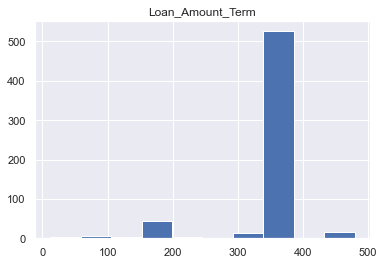

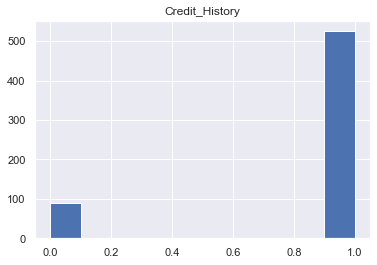

In [39]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

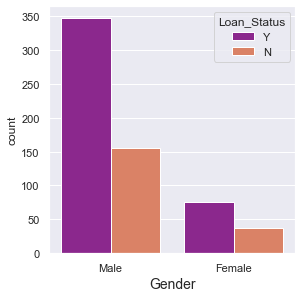

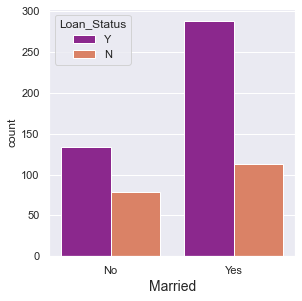

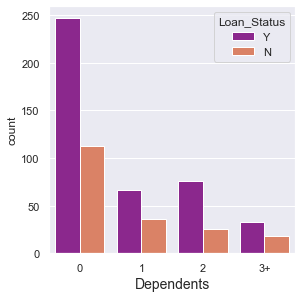

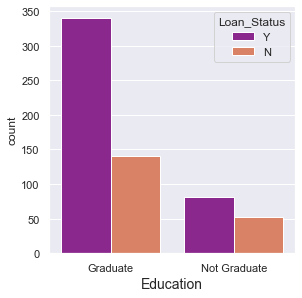

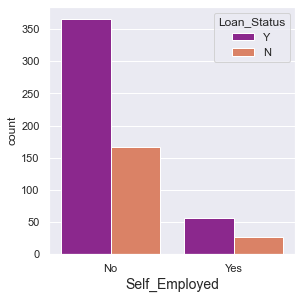

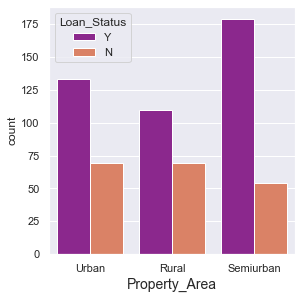

In [40]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

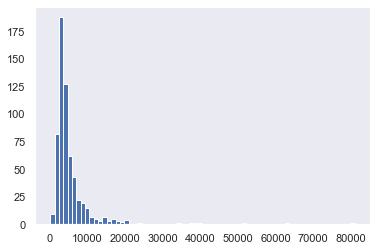

In [41]:
train_df['ApplicantIncome'].hist(bins=70,grid=False)

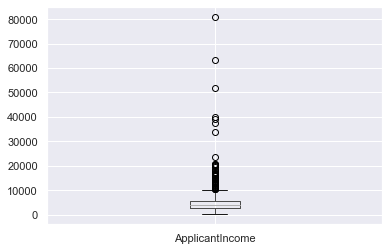

In [42]:
train_df.boxplot(column = 'ApplicantIncome')

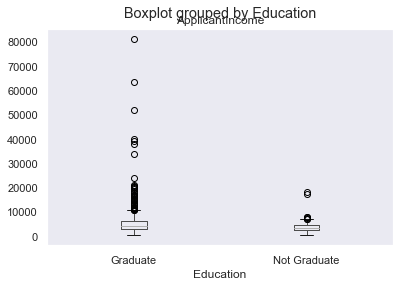

In [43]:
train_df.boxplot(column = 'ApplicantIncome', grid =False, by = 'Education')

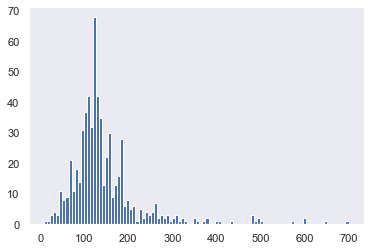

In [44]:
train_df['LoanAmount'].hist(bins=100,grid = False)

## Categorical Value Analysis

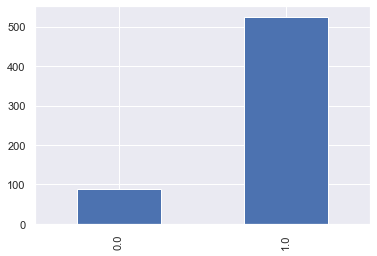

In [45]:
temp = train_df['Credit_History'].value_counts(ascending = True)
temp.plot(kind = 'bar')

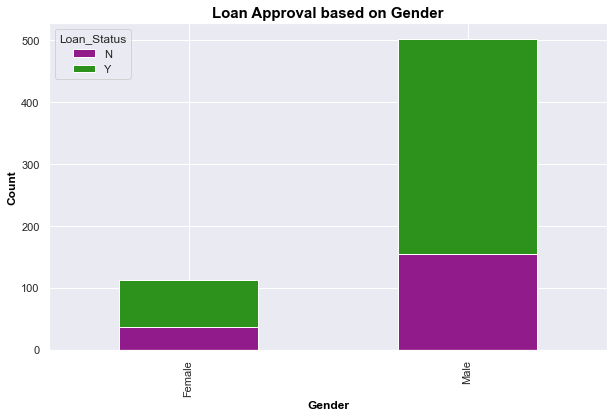

In [46]:
gender_loan = train_df.groupby(['Gender', 'Loan_Status']).size().unstack()
colors = ['#921b8b', '#2c921b']
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Gender', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Gender', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

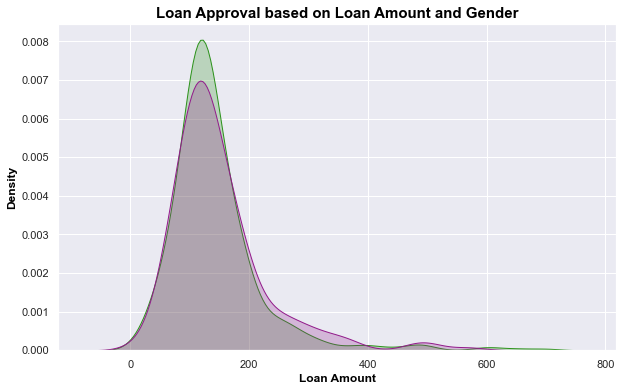

In [47]:
plt.figure(figsize=(10,6))
sns.kdeplot(train_df.loc[train_df['Loan_Status']=='Y', 'LoanAmount'], label='Approved', fill='1', color='#2c921b')
sns.kdeplot(train_df.loc[train_df['Loan_Status']=='N', 'LoanAmount'], label='Not Approved', fill='1', color='#921b8b')
plt.title('Loan Approval based on Loan Amount and Gender', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Loan Amount', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Density', fontsize=12, fontweight='bold', color='black')
plt.show()

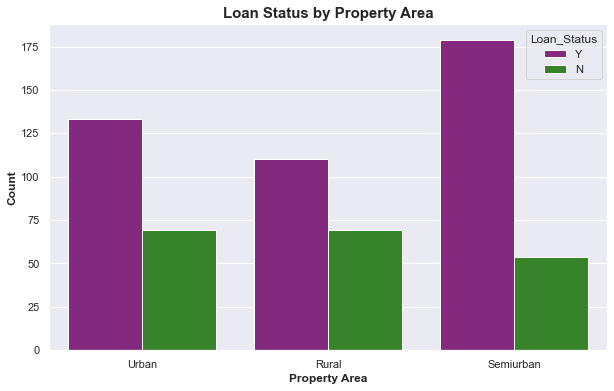

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Property_Area', hue='Loan_Status', palette=colors)
plt.title('Loan Status by Property Area', fontsize=15, fontweight='bold')
plt.xlabel('Property Area', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

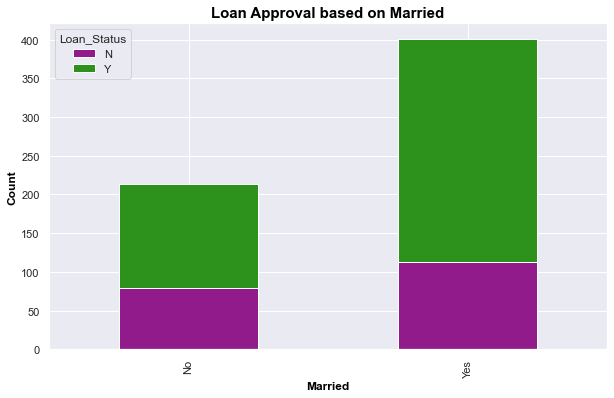

In [49]:
gender_loan =train_df.groupby(['Married', 'Loan_Status']).size().unstack()
colors = ['#921b8b', '#2c921b']
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Married', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Married', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

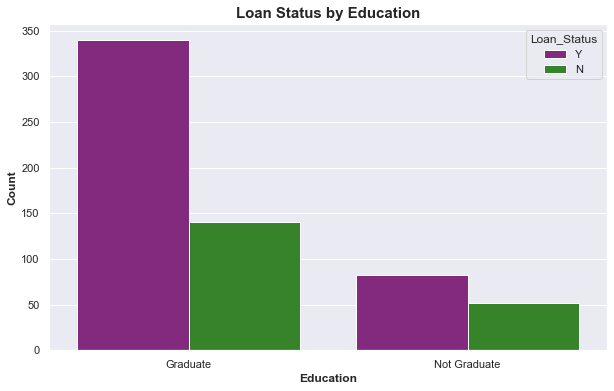

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Education', hue='Loan_Status', palette=colors)
plt.title('Loan Status by Education', fontsize=15, fontweight='bold')
plt.xlabel('Education', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

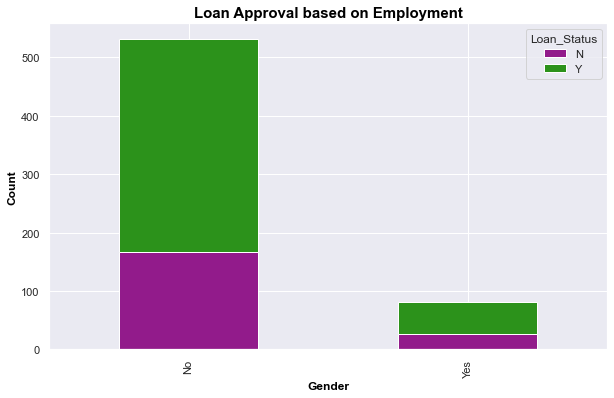

In [51]:
gender_loan = train_df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()
colors = ['#921b8b', '#2c921b']
gender_loan.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
plt.title('Loan Approval based on Employment', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Gender', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='black')
plt.show()

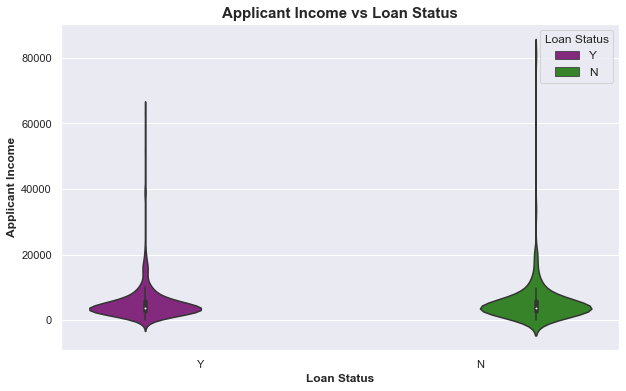

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x='Loan_Status', y='ApplicantIncome', hue='Loan_Status', palette=colors)
plt.title('Applicant Income vs Loan Status', fontsize=15, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Applicant Income', fontsize=12, fontweight='bold')
plt.legend(title='Loan Status', fontsize=12, title_fontsize=12)
plt.show()

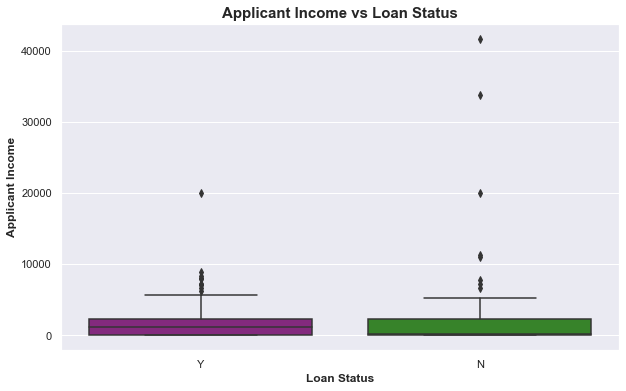

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Loan_Status', y='CoapplicantIncome', palette=colors)
plt.title('Applicant Income vs Loan Status', fontsize=15, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Applicant Income', fontsize=12, fontweight='bold')
plt.show()

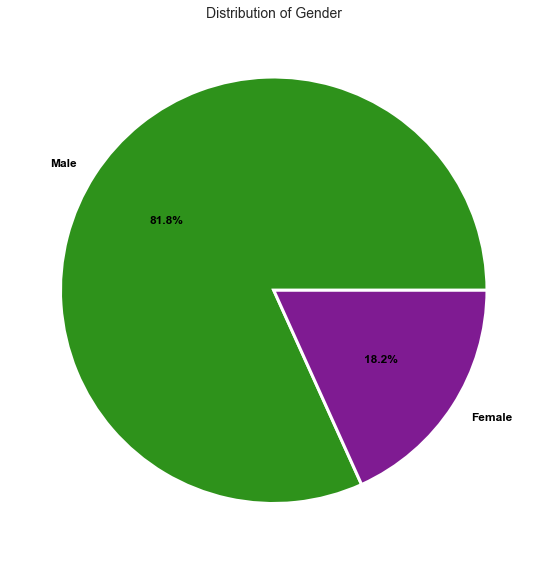

In [54]:
# Count the number of occurrences for each gender
gender_counts =train_df['Gender'].value_counts()

color_pie= ['#2e921b', '#7f1b92']

# Create a pie plot
names = ['Male', 'Female']
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(gender_counts, labels=names, autopct='%.1f%%', colors=color_pie,
       wedgeprops={'linewidth': 3.0, 'edgecolor': '#FFFFFF'},
       textprops={'size': 'medium', 'color':'#000000', 'weight':'bold'})
ax.set_title('Distribution of Gender', fontsize=14)
plt.tight_layout()

In [55]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
train_df = train_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
test_df = test_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(train_df.Dependents)
Dependents__ = pd.to_numeric(test_df.Dependents)

# dropping the previous Dependents column
train_df.drop(['Dependents'], axis = 1, inplace = True)
test_df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
train_df = pd.concat([train_df, Dependents_], axis = 1)
test_df = pd.concat([test_df, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {train_df.shape}\n\ntesting set (row, col): {test_df.shape}\n")
print(train_df.info(), "\n\n", test_df.info())

training set (row, col): (614, 12)

testing set (row, col): (614, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 column

In [56]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_df[i] = le.fit_transform(train_df[i])
train_df.head() 

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,0,1,0,1,5849,0.0,120.0,360.0,1.0,2,1,0
1,0,0,0,1,4583,1508.0,128.0,360.0,1.0,0,0,1
2,0,0,0,0,3000,0.0,66.0,360.0,1.0,2,1,0
3,0,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1,0
4,0,1,0,1,6000,0.0,141.0,360.0,1.0,2,1,0


In [57]:
# Create a contingency table
contingency_table = pd.crosstab(train_df['Gender'], train_df['Loan_Status'])

# Print the contingency table
print(contingency_table)

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print('P-value: ', p_val)
if p_val <= 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Loan_Status    0    1
Gender               
0            155  347
1             37   75
P-value:  0.7391461310869638
We fail to reject the null hypothesis.


In [58]:
# create a contingency table of marital status and loan status
cont_table = pd.crosstab(train_df['Married'], train_df['Loan_Status'])

# perform chi-squared test of independence
chi2_stat, p_val, dof, exp_freq = chi2_contingency(cont_table)

# Print the contingency table
print(cont_table)

# print the p-value
print('P-value:', p_val)
if p_val < 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Loan_Status    0    1
Married              
0            113  288
1             79  134
P-value: 0.029608580862582116
We reject the null hypothesis.


In [59]:
# create a contingency table of loan status and education level
cont_table = pd.crosstab(train_df['Loan_Status'], train_df['Education'], margins=True)

# run the chi-squared test and print the results
chi2, pval, dof, expected = chi2_contingency(cont_table)
print(f'Chi-squared statistic: {chi2}\nP-value: {pval}\nDegrees of freedom: {dof}\nExpected frequencies:\n{expected}')
if p_val < 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Chi-squared statistic: 4.5288927351787684
P-value: 0.3391352834234793
Degrees of freedom: 4
Expected frequencies:
[[150.09771987  41.90228013 192.        ]
 [329.90228013  92.09771987 422.        ]
 [480.         134.         614.        ]]
We reject the null hypothesis.


In [60]:
# create a contingency table of Self_employed and Loan_Status
cont_table = pd.crosstab(train_df['Self_Employed'], train_df['Loan_Status'])

# perform the chi-squared test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {pval}")
print(f"Degrees of freedom: {dof}")

if p_val < 0.05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Chi-squared statistic: 0.0013148242700656973
P-value: 0.9710746411403309
Degrees of freedom: 1
We reject the null hypothesis.


## Correlation matrix

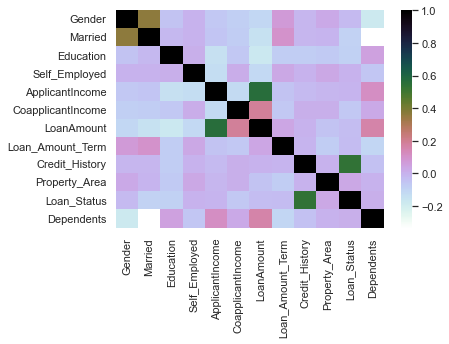

In [61]:
#plotting the correlation matrix
sns.heatmap(train_df.corr() ,cmap='cubehelix_r')

In [62]:
#correlation table
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


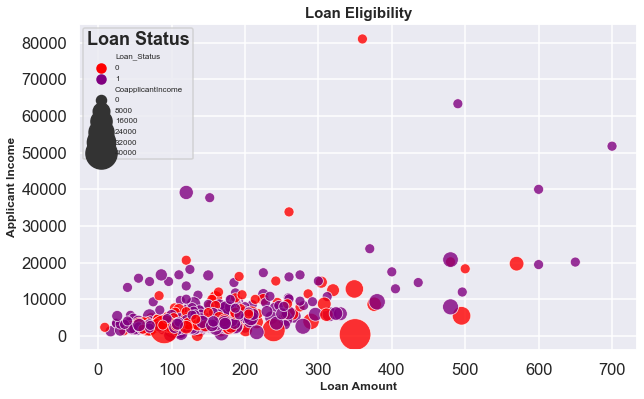

In [63]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.set_context('talk')

# Define colors
colors = ['red', 'purple']

# Define plot
plot = sns.scatterplot(data=train_df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', size='CoapplicantIncome', sizes=(100, 1000), alpha=0.8, palette=colors)
# Set title and axis labels
plot.set_title('Loan Eligibility', fontsize=15, fontweight='bold')
plot.set_xlabel('Loan Amount', fontsize=12, fontweight='bold')
plot.set_ylabel('Applicant Income', fontsize=12, fontweight='bold')

# Set legend title and font size
legend = plot.legend(title='Loan Status', fontsize=8)
legend.get_title().set_fontweight('bold')

plt.show()

In [64]:
# Filter out non-numeric columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create parallel coordinates plot
fig = px.parallel_coordinates(train_df, color="LoanAmount", dimensions=numeric_cols)

# Update figure layout
fig.update_layout(
    #title="Loan Eligibility",
    title_font_size=15,
    xaxis_title="Attributes",
    yaxis_title="Values",
    font=dict(size=12, color="black"),
    legend_title="Loan Status",
    legend_font_size=12,
    legend_traceorder="reversed",
    width=1000,
    height=500
)

fig.show()

In [65]:
# Create a 3D scatter plot
fig = px.scatter_3d(train_df, x='ApplicantIncome', y='CoapplicantIncome', z='LoanAmount', color='Loan_Status')

# Show the plot
fig.show()

In [66]:
train_df['Married'].value_counts ().head()

0    401
1    213
Name: Married, dtype: int64

## Machine learning models

In [67]:
y = train_df['Loan_Status']
X = train_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
# DecisionTree modle
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.49      0.53      0.51        51
           1       0.82      0.79      0.80       134

    accuracy                           0.72       185
   macro avg       0.65      0.66      0.66       185
weighted avg       0.73      0.72      0.72       185

71.89% Accurate


In [69]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Dection Tree.csv") 

In [70]:
# RandomForest modle
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.76      0.43      0.55        51
           1       0.81      0.95      0.88       134

    accuracy                           0.81       185
   macro avg       0.79      0.69      0.71       185
weighted avg       0.80      0.81      0.79       185

80.54% Accurate


In [71]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv") 

In [72]:
#XGBoost modle
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185

79.46% Accurate


In [73]:
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv") 

In [74]:
#Logistic Regression modle
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        51
           1       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185

accuracy is 0.8216216216216217


In [75]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")

In [76]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
3,Logistic Regression,0.821622
1,Random Forest,0.805405
2,XGBoost,0.794595
0,Decision Tree,0.718919


In [77]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((614, 5), (614,))

In [78]:
import joblib

In [79]:
final_model = Logistic_Regression.to_csv("Logistic Regression.csv")

In [80]:
joblib.dump(final_model , "Model.pk10")
joblib.dump(X.columns , "Inputs.pkl0")

['Inputs.pkl0']

In [81]:
X.columns

Index(['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History'], dtype='object')

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           614 non-null    int64  
 1   Married          614 non-null    int64  
 2   ApplicantIncome  614 non-null    int64  
 3   LoanAmount       614 non-null    float64
 4   Credit_History   614 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 24.1 KB


In [85]:
sorted(X["Gender"].unique().tolist())

[0, 1]

In [88]:
%%writefile app11.py
 
import pickle
import streamlit as st


# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1
 
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    LoanAmount = LoanAmount / 1000
 
    # Making predictions 
    prediction = classifier.predict( 
        [[Gender, Married, ApplicantIncome, LoanAmount, Credit_History]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred
      
  # this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    ApplicantIncome = st.number_input("Applicants monthly income") 
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)
if __name__ == '__main__':
    main() 

Overwriting app11.py
